# Лабораторная работа №3

**Тема:** Оптимизация системы с ограниченной очередью (банковское обслуживание "одно окошко")

**Цель работы:** Исследовать характеристики системы массового обслуживания с ограниченной очередью (M/M/1/m) и определить оптимальные параметры системы для минимизации потерь заявок и времени ожидания.

**Задачи:**
- Разработать математическую модель системы M/M/1/m.
- Провести расчёты основных характеристик системы:
  - Вероятность потерь заявок;
  - Среднее число заявок в очереди;
  - Среднее время ожидания заявки в очереди;
  - Среднее время пребывания заявки в системе;
  - Коэффициент загрузки системы.
- Определить оптимальную длину очереди, при которой вероятность потерь не превышает 5%.
- Построить графики зависимости характеристик от длины очереди.
- Сделать выводы о работе системы и дать рекомендации по оптимальному выбору длины очереди.


## 1. Описание модели

Система моделируется по схеме **M/M/1/m**, где:
- **M/M/1** – интервалы между заявками и время обслуживания распределены по экспоненциальному закону, имеется 1 канал обслуживания.
- **m** – максимальная длина очереди (число заявок, ожидающих обслуживания). Таким образом, общее число мест в системе равно \( K = m + 1 \) (одна заявка обслуживается и \( m \) заявок может ожидать).

Если заявка поступает в систему, когда число заявок равно \( K \) (система заполнена), заявка блокируется (теряется).

**Исходные параметры:**
- Интенсивность входящего потока заявок: $$ \lambda = 8 заявок/час. $$
- Интенсивность обслуживания: $$ \mu = 10 заявок/час. $$
- Коэффициент загрузки: $$ \rho = \frac{\lambda}{\mu}. $$


## 2. Формулы для расчётов

**Распределение состояний системы:**

$$
p_0 = \frac{1 - \rho}{1 - \rho^{K+1}}, \quad p_n = \rho^n \, p_0, \quad n = 0, 1, \dots, K
$$

где $$ K = m + 1 $$

**Вероятность потерь (блокировки заявки):**

$$
p_{\text{loss}} = p_K
$$

**Среднее число заявок в системе:**

$$
L = \sum_{n=0}^{K} n \, p_n
$$

**Среднее число заявок в очереди:**

$$
L_q = L - (1 - p_0)
$$

**Эффективная интенсивность входа (с учетом блокировок):**

$$
\lambda_{\text{eff}} = \lambda \, (1 - p_{\text{loss}})
$$

**Среднее время пребывания заявки в системе (формула Литтла):**

$$
W = \frac{L}{\lambda_{\text{eff}}}
$$

**Среднее время ожидания заявки в очереди:**

$$
W_q = \frac{L_q}{\lambda_{\text{eff}}}
$$

**Загрузка сервера (вероятность, что сервер занят):**

$$
\text{Utilization} = 1 - p_0
$$


## 3. Расчёт характеристик системы и оптимизация длины очереди

В данной части производится расчёт основных характеристик системы для различных значений длины очереди \( m \) (от 1 до 15) и поиск оптимального значения \( m \), при котором вероятность потерь \( p_{\text{loss}} \) не превышает 5%.


In [19]:
from lab3.lab.result import show_plot, print_res

In [20]:
print_res()

m	p_loss		L_queue		W_queue		W_system	Server Utilization
1	0.2623		0.2623		0.0444		0.1444		0.5902
2	0.1734		0.5637		0.0852		0.1852		0.6612
3	0.1218		0.8605		0.1225		0.2225		0.7025
4	0.0888		1.1394		0.1563		0.2563		0.7289
5	0.0663		1.3955		0.1868		0.2868		0.7469
6	0.0504		1.6276		0.2142		0.3142		0.7597
7	0.0388		1.8358		0.2387		0.3387		0.7690
8	0.0301		2.0212		0.2605		0.3605		0.7759
9	0.0235		2.1851		0.2797		0.3797		0.7812
10	0.0184		2.3293		0.2966		0.3966		0.7852
11	0.0145		2.4554		0.3115		0.4115		0.7884
12	0.0115		2.5651		0.3244		0.4244		0.7908
13	0.0091		2.6603		0.3356		0.4356		0.7927
14	0.0072		2.7424		0.3453		0.4453		0.7942
15	0.0058		2.8130		0.3537		0.4537		0.7954

Оптимальная длина очереди (m), при которой p_loss <= 5%: m = 7


## 4. Построение графиков

Ниже представлены графики зависимости вероятности потерь $$  p_{\text{loss}} $$ и среднего времени ожидания $$ W_q $$ от длины очереди $$ m $$


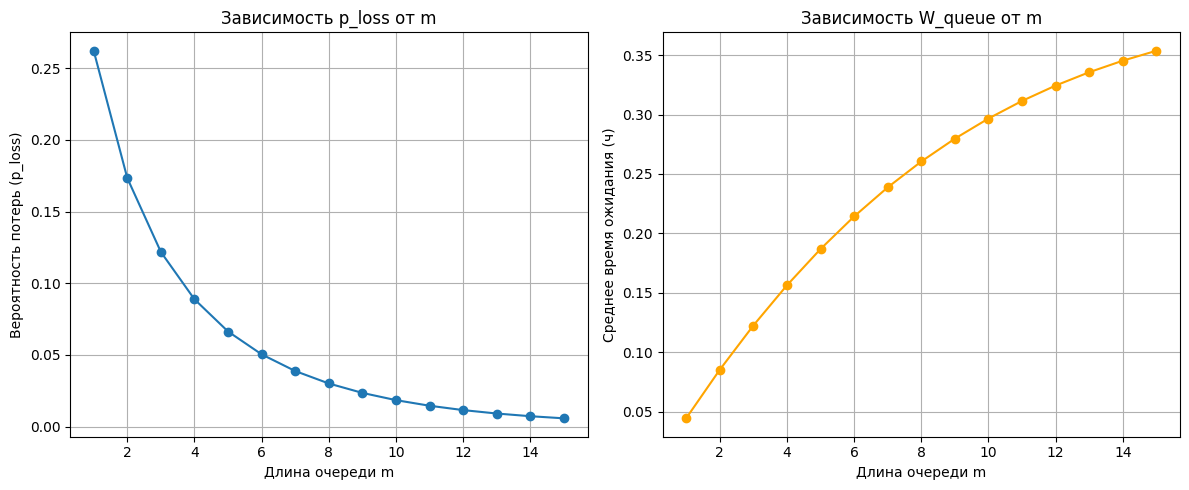

In [21]:
show_plot()

## 5. Анализ результатов и выводы

**Результаты расчётов:**
- Таблица, выведенная в консоль, демонстрирует, как меняются характеристики системы при изменении \( m \).
- Графики показывают, что при увеличении \( m \) вероятность потерь \( p_{\text{loss}} \) уменьшается, а время ожидания \( W_q \) меняется в зависимости от оптимального баланса между уменьшением потерь и увеличением ожидания.

**Выводы:**
- При малых значениях \( m \) вероятность блокировки заявок высока, что может привести к потере клиентов (например, в банке).
- Увеличение \( m \) приводит к снижению вероятности потерь, однако может увеличивать время ожидания.
- Оптимальное значение \( m \) выбирается так, чтобы вероятность потерь не превышала 5%. В нашем расчёте оптимальное значение найдено как **m = 7**.

**Рекомендации:**
- Для банковского обслуживания (одно окно) рекомендуется выбрать длину очереди, при которой вероятность потерь не превышает 5%, что обеспечивает баланс между качеством обслуживания и затратами.
- Рекомендуется дополнительно анализировать влияние изменения интенсивностей потока $$ \lambda $$ и обслуживания $$ \mu $$ для повышения устойчивости системы в пиковые периоды.

**Заключение:**
Проведённый анализ позволяет оптимизировать работу системы массового обслуживания, минимизируя потери заявок и время ожидания, что важно для повышения удовлетворённости клиентов.
